In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [72]:
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
import ot
import matplotlib.cm as cm
from scipy import stats

We have $\mathcal{C} = [0,1]\times[0,1]$ encoding *time management* and *writing ability* respectively. $\mathcal{O}$ is an interval containing the score on a writing exam. $\mathcal{D}$ an interval representing success as a professional writer. We take the true map $f:\mathcal{C}\to\mathcal{D}$ as
$$f(x) =  \begin{bmatrix} 1 & 1 \end{bmatrix}x$$
We first consider the map $g:\mathcal{C}\to\mathcal{O}$ induced by a specific test,
$$g(x) = \begin{bmatrix} 2 & 1 \end{bmatrix} x$$

Then for a simulated space of ten individuals, our spaces would look as follows:

In [73]:
def g(x):
    b1 = 2; b2 = 1;
    return b1*x[0] + b2*x[1]

def g_unfair(x):
    if x[2] == 0:
        return g(x[0:2])/2
    else:
        return g(x[0:2])

def f(x):
    return x[0] + x[1]

n_indiv = 10

In [74]:
#np.random.seed(87659732)
np.random.seed(348528)
construct_individuals = np.random.rand(n_indiv, 2)
individuals_class = np.random.binomial(1, 0.5, n_indiv)
construct_individuals_class =np.hstack([construct_individuals, individuals_class[:,None]])

In [75]:
observed_individuals = np.apply_along_axis(g, 1, construct_individuals)
observed_individuals_bias = np.apply_along_axis(g_unfair, 1, construct_individuals_class)
ideal_outcomes = np.apply_along_axis(f, 1, construct_individuals_class)

ordering = np.argsort(ideal_outcomes) # for matching colors in visualisation

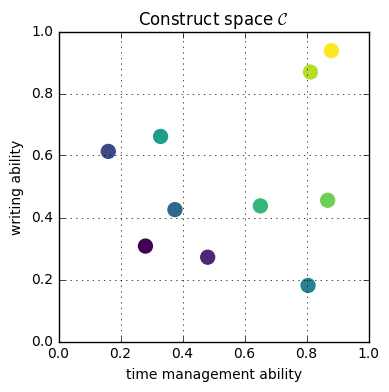

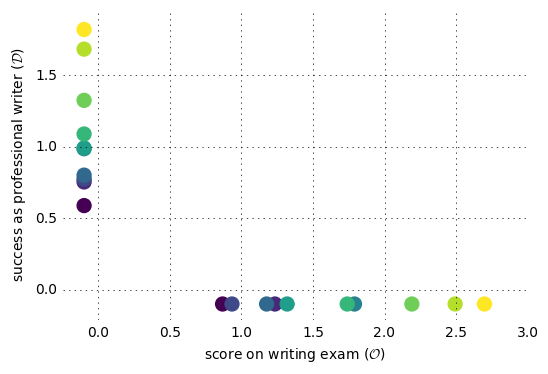

In [76]:
plt.figure()
plt.scatter(construct_individuals[ordering,0], construct_individuals[ordering,1], color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.axis('square')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel('time management ability')
plt.ylabel('writing ability')
plt.title('Construct space $\mathcal{C}$')
plt.grid()
plt.show()


# plt.figure()
# plt.scatter(observed_individuals[ordering], -0.1*np.ones(n_indiv), color=cm.viridis(np.linspace(0, 1, n_indiv)))
# plt.axis('square')
# plt.ylim([-0.25,0.25])
# plt.xlim([-0.25,3])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.gca().xaxis.grid(True)
# plt.show()

# plt.figure()
# plt.scatter(-0.1*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)))
# plt.axis('square')
# plt.xlim([-0.25,0.25])
# plt.ylim([-0.25,2])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.gca().yaxis.grid(True)
# plt.show()

plt.figure()
plt.scatter(observed_individuals[ordering], -0.1*np.ones(n_indiv), color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.scatter(-0.1*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.axis('equal')
plt.ylim([-0.25,2])
plt.xlim([-0.25,3])
plt.xlabel('score on writing exam ($\mathcal{O}$)')
plt.ylabel('success as professional writer ($\mathcal{D}$)')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid()

plt.show()

Next, we seek to find a mapping between the oberved space and the decision space. In principle, we could use any function, but we restrict to just linear functions for simplicity (it would be interesting to consider how practical considerations like this affect the framework), with $\hat f:\mathcal{O}\to\mathcal{D}$,
$$ \hat f(y) = my+b,~~~ (m,b) \in \arg\min_{m, b} \sum_{i=1}^N (my_i + b - d_i) $$


The triangle point represent how the least squares result $\hat f$ maps each individual.

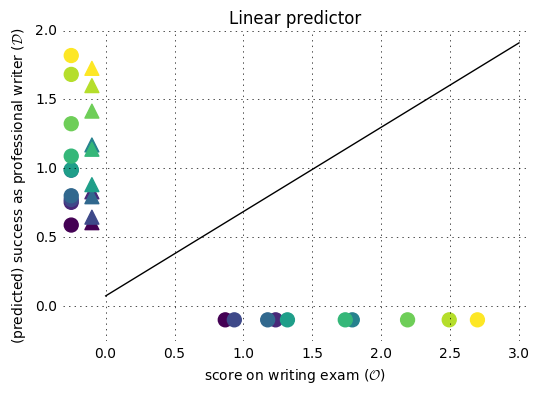

In [77]:
slope, intercept, r_value, p_value, std_err = stats.linregress(observed_individuals,ideal_outcomes)
def fhat(xhat):
    return slope*xhat + intercept

fit_individuals = np.apply_along_axis(fhat, 0, observed_individuals)

# plt.figure()
# plt.scatter(observed_individuals[ordering], -0.1*np.ones(n_indiv), color=cm.viridis(np.linspace(0, 1, n_indiv)))
# plt.scatter(-0.25*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)))
# plt.plot(np.linspace(0,3,100), np.apply_along_axis(fhat, 0, np.linspace(0,3,100)), 'black')
# plt.axis('equal')
# plt.ylim([-0.25,2])
# plt.xlim([-0.25,3])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.grid()

# plt.show()

plt.figure()
plt.scatter(observed_individuals[ordering], -0.1*np.ones(n_indiv), color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.scatter(-0.25*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.scatter(-0.1*np.ones(n_indiv), fit_individuals[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), marker='^', s=100)
plt.plot(np.linspace(0,3,100), np.apply_along_axis(fhat, 0, np.linspace(0,3,100)), 'black')
plt.axis('equal')
plt.ylim([-0.25,2])
plt.xlim([-0.25,3])
plt.xlabel('score on writing exam ($\mathcal{O}$)')
plt.ylabel('(predicted) success as professional writer ($\mathcal{D}$)')
plt.title('Linear predictor')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid()

plt.show()

Consider what happens if we instead wish to classify high and low performing professional writers using a threshold (say, 0.85)

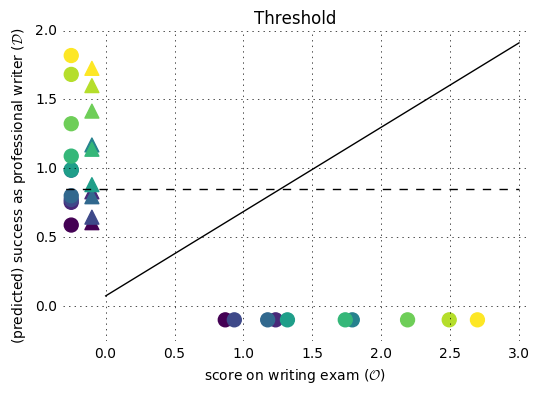

In [78]:
thresh = 0.85
def fhat_disc(xhat):
    return (slope*xhat + intercept > thresh)


plt.figure()
plt.scatter(observed_individuals[ordering], -0.1*np.ones(n_indiv), color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.scatter(-0.25*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.scatter(-0.1*np.ones(n_indiv), fit_individuals[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), marker='^', s=100)

plt.plot(np.linspace(0,3,100), np.apply_along_axis(fhat, 0, np.linspace(0,3,100)), 'black')
plt.plot(np.linspace(-1,3,10), thresh*np.ones(10),linestyle='--', color='black')
plt.axis('equal')
plt.ylim([-0.25,2])
plt.xlim([-0.25,3])
plt.xlabel('score on writing exam ($\mathcal{O}$)')
plt.ylabel('(predicted) success as professional writer ($\mathcal{D}$)')
plt.title('Threshold')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid()

plt.show()


 The mapping $\hat f$ is no longer continuous, so we can find points that are very close in $\mathcal{C}$ that map to different classes in $\mathcal{D}$. This can lead to a violation of fairness criteria.

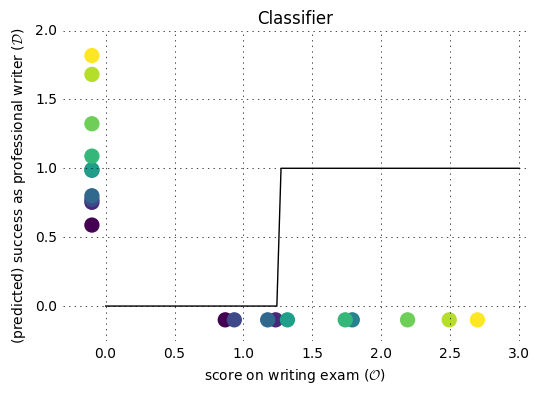

In [79]:

plt.figure()
plt.scatter(observed_individuals[ordering], -0.1*np.ones(n_indiv), color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.scatter(-0.1*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.plot(np.linspace(0,3,100), np.apply_along_axis(fhat_disc, 0, np.linspace(0,3,100)), 'black')
plt.axis('equal')
plt.ylim([-0.25,2])
plt.xlim([-0.25,3])
plt.xlabel('score on writing exam ($\mathcal{O}$)')
plt.ylabel('(predicted) success as professional writer ($\mathcal{D}$)')
plt.title('Classifier')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid()

plt.show()

Switching gears, we now consider a population where individuals below to one of two groups. For visualization, this will be represented by their shapes.

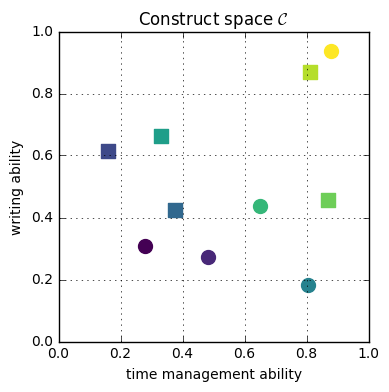

In [80]:
plt.figure()
for i,j in zip(ordering, np.linspace(0, 1, n_indiv)):
    if individuals_class[i] == 0:
        plt.scatter(construct_individuals[i,0], construct_individuals[i,1], color=cm.viridis(j), s=100)
    else:
        plt.scatter(construct_individuals[i,0], construct_individuals[i,1], color=cm.viridis(j), marker='s', s=100)
plt.axis('square')
plt.xlabel('time management ability')
plt.ylabel('writing ability')
plt.title('Construct space $\mathcal{C}$')
plt.ylim([0,1])
plt.xlim([0,1])
plt.grid()
plt.show()


#plt.figure()

# for i,j in zip(ordering, np.linspace(0, 1, n_indiv)):
#     if individuals_class[i] == 0:
#         plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j))
#     else:
#         plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j), marker='s')
# plt.axis('square')
# plt.ylim([-0.25,0.25])
# plt.xlim([-0.25,3])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.gca().xaxis.grid(True)
# plt.show()

# plt.figure()
# plt.scatter(-0.1*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)))
# plt.axis('square')
# plt.xlim([-0.25,0.25])
# plt.ylim([-0.25,2])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='off')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.gca().yaxis.grid(True)
# plt.show()

# plt.figure()
# for i,j in zip(ordering, np.linspace(0, 1, n_indiv)):
#     if individuals_class[i] == 0:
#         plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j))
#     else:
#         plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j), marker='s')
# plt.scatter(-0.1*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)))
# plt.axis('equal')
# plt.ylim([-0.25,2])
# plt.xlim([-0.25,3])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.grid()

# plt.show()#

To illustrate ideas related to structural bias, consider the map $g_b:\mathcal{C}\to\mathcal{O}$ induced by a specific test on which members of different groups perform differently.
$$g_b(x) = \begin{cases} \begin{bmatrix} 2 & 1 \end{bmatrix} x \text{ a square}\\
\begin{bmatrix} 1 & \frac{1}{2} \end{bmatrix} x \text{ a circle}
\end{cases}$$

Using this map instead, we construct a linear regression as above. This time, inconsistencies are clear.

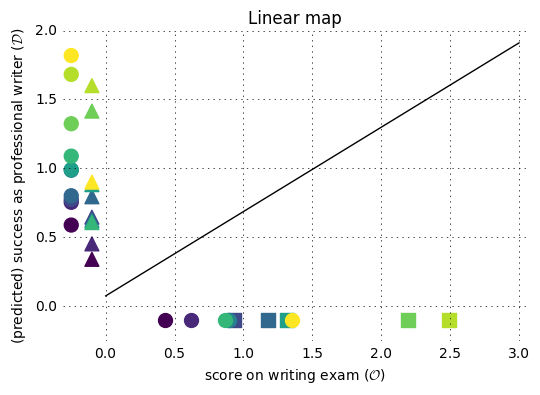

In [81]:
slope, intercept, r_value, p_value, std_err = stats.linregress(observed_individuals,ideal_outcomes)
def fhat(xhat):
    return slope*xhat + intercept

fit_individuals = np.apply_along_axis(fhat, 0, observed_individuals_bias)

# plt.figure()
# for i,j in zip(ordering, np.linspace(0, 1, n_indiv)):
#     if individuals_class[i] == 0:
#         plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j))
#     else:
#         plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j), marker='s')
# plt.scatter(-0.25*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)))
# plt.plot(np.linspace(0,3,100), np.apply_along_axis(fhat, 0, np.linspace(0,3,100)), 'black')
# plt.axis('equal')
# plt.ylim([-0.25,2])
# plt.xlim([-0.25,3])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# plt.grid()

# plt.show()

plt.figure()
for i,j in zip(ordering, np.linspace(0, 1, n_indiv)):
    if individuals_class[i] == 0:
        plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j), s=100)
    else:
        plt.scatter(observed_individuals_bias[i], -0.1, color=cm.viridis(j), marker='s', s=100)
plt.scatter(-0.25*np.ones(n_indiv), ideal_outcomes[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), s=100)
plt.scatter(-0.1*np.ones(n_indiv), fit_individuals[ordering], color=cm.viridis(np.linspace(0, 1, n_indiv)), marker='^', s=100)
plt.plot(np.linspace(0,3,100), np.apply_along_axis(fhat, 0, np.linspace(0,3,100)), 'black')
plt.axis('equal')
plt.ylim([-0.25,2])
plt.xlim([-0.25,3])
plt.xlabel('score on writing exam ($\mathcal{O}$)')
plt.ylabel('(predicted) success as professional writer ($\mathcal{D}$)')
plt.title('Linear map')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.grid()

plt.show()

We can make rigorous the notion of structural bias by computing the *group skew* between the construct and observed spaces under the map $g$.
$$\sigma_{g} =  \frac{\mathcal{G}(\mathcal{C},\mathcal{O})}{\frac{1}{2}(\mathcal{G}(\mathcal{C_\square},\mathcal{O_\square})+\mathcal{G}(\mathcal{C_o},\mathcal{O_o}))}$$

In [82]:
def gromov_wasserstein_between(x, y):
    n,_ = x.shape
    C1 = sp.spatial.distance.cdist(x, x)
    C2 = sp.spatial.distance.cdist(y, y)

    C1 /= C1.max()
    C2 /= C2.max()

    p = ot.unif(n)
    q = ot.unif(n)

    gw = ot.gromov_wasserstein(C1, C2, p, q, 'square_loss', epsilon=5e-4)
    gw_dist = ot.gromov_wasserstein2(C1, C2, p, q, 'square_loss', epsilon=5e-4)
    return gw_dist



In [83]:
GW = gromov_wasserstein_between(construct_individuals, observed_individuals[:,None])
GW0 = gromov_wasserstein_between(construct_individuals[individuals_class == 0], observed_individuals[individuals_class == 0,None])
GW1 = gromov_wasserstein_between(construct_individuals[individuals_class == 1], observed_individuals[individuals_class == 1,None])
print('Group skew under g:\t', GW / (GW0 + GW1) * 2)

Group skew under g:	 1.2140800267


In [84]:
GW = gromov_wasserstein_between(construct_individuals, observed_individuals_bias[:,None])
GW0 = gromov_wasserstein_between(construct_individuals[individuals_class == 0], observed_individuals_bias[individuals_class == 0,None])
GW1 = gromov_wasserstein_between(construct_individuals[individuals_class == 1], observed_individuals_bias[individuals_class == 1,None])
print('Group skew under biased g:\t', GW / (GW0 + GW1) * 2)

Group skew under biased g:	 1.43381682791


The next step would be to create an alternative mapping $\hat f$ that equalized the group skew in $\mathcal{D}$. A quick and easy suggestion might be two least-squares estimates, each estimated on a single class. (Although it is not clear that this would always result in a group fairness mechanism)